# Company data problem

## Importing necessary libraries 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Initial analysis

In [3]:
df.shape

(400, 11)

In [4]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### Data Preparation

In [6]:
#first convert in categorical variable
df['ShelveLoc']=df['ShelveLoc'].astype('category')
df['Urban']=df['Urban'].astype('category')
df['US']=df['ShelveLoc'].astype('category')

df.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [7]:
df['ShelveLoc']=df['ShelveLoc'].astype('category').cat.codes
df['Urban']=df['Urban'].astype('category').cat.codes
df['US']=df['ShelveLoc'].astype('category').cat.codes
df['US']

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: US, Length: 400, dtype: int8

In [8]:
df['Urban']

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban, Length: 400, dtype: int8

In [9]:
df['ShelveLoc']

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int8

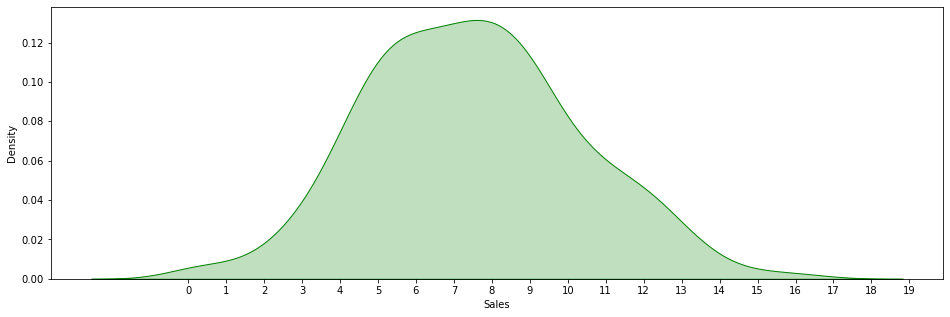

In [10]:
plt.figure(figsize=(16,5))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show() ##### Right skewed

### converting target variables into discrete variable

In [11]:
df['Sales']=df['Sales'].map(lambda x:1 if x>8 else 0)
df['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

#### Spliting x and y

In [12]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,0
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,2
3,0,117,100,4,466,97,2,55,14,1,2
4,0,141,64,3,340,128,0,38,13,1,0


In [13]:
X=df.drop(labels='Sales',axis=1)
y=df[['Sales']]

In [14]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,0
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,2
3,117,100,4,466,97,2,55,14,1,2
4,141,64,3,340,128,0,38,13,1,0


In [15]:
y.head()

,Sales
0,1
1,1
2,1
3,0
4,0


### Train- test spilt


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

## Model building,training and testing

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,max_depth=10)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [18]:
y_train_pred=rf_model.predict(X_train)

In [19]:
y_test_pred=rf_model.predict(X_test)

# Model evaluation

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

### For train data

In [21]:
accuracy_score(y_train,y_train_pred)

1.0

In [22]:
confusion_matrix(y_train,y_train_pred)

array([[187,   0],
       [  0, 133]], dtype=int64)

In [23]:
precision_score(y_train,y_train_pred)

1.0

### For test data

In [24]:
accuracy_score(y_test,y_test_pred)

0.7625

In [25]:
confusion_matrix(y_test,y_test_pred)

array([[43,  6],
       [13, 18]], dtype=int64)

In [26]:
precision_score(y_test,y_test_pred)

0.75